<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 1.0 !important; }</style>';
</script>
<!--# STAT 207: Data Science Exploration-->

<h1 style="color:blue;">Unit 12: Classification and ROC Analysis</h1>

The previous section explored logistic regression as a tool for modeling the dependence of a binary response variable on other exogenous variables. Once a the model is built, it is possible to use it for prediction purposes, by viewing the logistic regression model as a **classification algorithm**. In this usage, the estimated probabilities (fitted values) from the logistic regression model provide scores that can be thresholded to create a 0/1 classfier.

For example, suppose we have a model that provides a probability of rain each day. We might view a fitted probability greater than or equal to 50% as a prediction of rain, and a fitted probability less than 50% as a prediction of no rain. 

How good is the classifer? The confusion matrix provides a way to keep track of the performance by cross classifying the true and predicted classes. From the confusion matrix we can compute:

+ **Sensitivity:** fraction of true positives that are called positive by the algorithm for a given threshold;

+ **Specificity:** fraction of true negatives that are called negative by the algorithm for a given threshold.

The **ROC curve** provides an overall summary of how good a scoring system across all possible thresholds, by graphing sensitivity versus 1 - specificity. This can also be used to find the optimal threshold.


**New package: scikit-learn - machine learning package**

To install this on your computer enter the following command from a terminal or anaconda window:

    conda install scikit-learn
 


<h1 style="color:blue;"><u>Topic 1</u>: Classification with Logistic Regression (with Simulated Data)</h1>

## First let's generate 100 data points $(x_1,y_1),...,(x_{100},y_{100})$.
* $y_i$ = Categorical Response Variable Value (1 or 0)
* $x_i$ = Numerical Explanatory Variable ($x_i$ are observations drawn from the standard normal distribution).
* Furthermore, let's create a relationship between $x_i$ and $y_i$ as follows:
    - $log-odds_i=log(p_i/(1-p_i))=-0.7+2.1x_i$,
    - $odds_i=p_i/(1-p_i)=exp(-0.7+2.1x_i)$,    
    - $y_i\sim Bernoulli(p_i)$
    
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [1]:
import numpy as np
import pandas as pd
import zipfile as zp

In [2]:
from scipy.stats import norm, bernoulli

In [3]:
# set the coefficient values
b0, b1 = -0.7, 2.1  
#
# generate exogenous variable
x = norm.rvs(size=100, random_state=12347)
print()
print('Simulated Explanatory Variable Values')
print(x)
#
# odds depend on x
print()
print('Predicted Odds Values (given these explanatory variable values)')
odds = np.exp(b0 + b1*x)
print(odds)
#
print()
print('Predicted Probabilties (given these explanatory variable values)')
print(odds/(1+odds))
# convert odds to probabilities, generate response y
print()
print('Randomly Generated 0/1 Response Variable Value (given the predicted probabilities)')
y = bernoulli.rvs(p=odds/(1+odds), size=100, random_state=1)
print(y)
dat = pd.DataFrame({'x':x, 'y':y})
print('Simulated Explanatory and Response Variables Data')
print(dat.head(10))


Simulated Explanatory Variable Values
[ 3.43686856e-01  1.84840043e+00  2.24359353e-01 -1.63366001e+00
  1.24553764e+00  1.71281180e+00 -6.87918329e-01 -1.18623852e+00
 -4.00249494e-01 -3.03626185e-01 -1.83256545e+00  1.74946221e+00
  1.42782655e-01  1.23757615e+00  1.53648398e+00  1.20246058e+00
 -4.03077542e-01  1.47360612e+00 -1.37076419e+00  3.41535013e-01
  3.33221347e-01 -6.07517496e-01 -1.69986595e+00  1.53454538e+00
  1.40225648e+00 -1.12625332e-01  1.16304827e+00 -8.78694596e-01
 -3.20791229e-01  2.55685889e-01  1.07326071e+00 -1.48523861e-01
  8.11851470e-02 -1.91191247e+00  8.56759066e-01 -4.51892464e-01
  4.76712331e-01  1.16111637e+00  2.04491326e+00 -7.58926671e-01
  5.79516051e-01  9.69182863e-01  7.10046985e-01  1.10390116e-02
  5.47076489e-01 -6.88079368e-01 -1.78661786e-01  8.02021891e-01
  4.29862250e-01  1.51651818e+00 -7.93327375e-01  6.73740653e-01
  1.52595028e+00  6.96695737e-01  1.41802423e+00 -2.25458753e-01
  3.59542591e-01  1.68028205e-01 -3.14180863e+00  2

## Next, let's fit the simulated data with a model.

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
simmod = smf.logit('y ~ x', data=dat).fit()
simmod.summary()

Optimization terminated successfully.
         Current function value: 0.403715
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:                  0.4149
Time:                        19:08:31   Log-Likelihood:                -40.371
converged:                       True   LL-Null:                       -68.994
Covariance Type:            nonrobust   LLR p-value:                 3.846e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4938      0.291     -1.697      0.090      -1.064       0.076
x              2.2133      0.440      5.028      0.000       1.350       3.076
==============================================================================
"""

## Then, let's make predictions for the $p_i$'s based on the model and some *new* $x_i$ values. These are the predictive probabilities.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [6]:
# example predictive probabilities
simmod.predict(exog=dict(x=[-2,-1,0,1,2])) 

0    0.007243
1    0.062554
2    0.378988
3    0.848056
4    0.980786
dtype: float64

## Then, let's plot:
### * 100 simulated $(x_1,y_1),...,(x_{100},y_{100})$ points and 
### * the curve that represents the model's predicted probability $p$ for any given value of x.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Bad key "text.kerning_factor" on line 4 in
C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


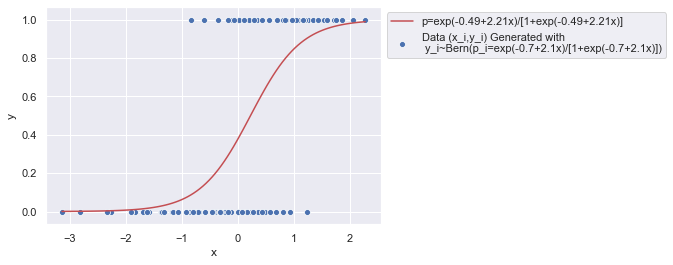

In [8]:
# scatter plot of raw 0/1 data
sns.scatterplot(x='x', y='y', data=dat, label='Data (x_i,y_i) Generated with \n y_i~Bern(p_i=exp(-0.7+2.1x)/[1+exp(-0.7+2.1x)])')
#
# make a grid of x values for the probability curve
xgrid = np.linspace(dat['x'].min(), dat['x'].max(), 100)
#
# get predictive probabilities for the grid
pgrid = simmod.predict(exog=dict(x=xgrid))
#
# add the curve to the plot
plt.plot(xgrid, pgrid, color='r', label='p=exp(-0.49+2.21x)/[1+exp(-0.49+2.21x)]') 
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Interpret this relationship between the curve and the data:

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### What does this model $p=exp(-0.49+2.21x)/[1+exp(-0.49+2.21x)]$ actually predict for a given value of $x$?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### How can we use this model $p=exp(-0.49+2.21x)/[1+exp(-0.49+2.21x)]$ to CLASSIFY a value of $x$ as having either a y=0 or y=1 response variable value?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### What happens is this threshold is $p_0=0.5$?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [9]:
pred_probabilities=simmod.predict(exog=dict(x=dat.x)) 
dat['pred']=pred_probabilities
dat

,x,y,pred
0,0.343687,1,0.566315
1,1.848400,1,0.973330
2,0.224359,0,0.500681
3,-1.633660,0,0.016149
4,1.245538,1,0.905756
...,...,...,...
95,2.270070,1,0.989339
96,1.590714,1,0.953773
97,-1.068407,0,0.054242
98,-2.827127,0,0.001168


### Will there exist a threshold value of $p_0$ that will create no misclassifications of the given data?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Sketch an example of a dataset and predictive probability curve in which there *would* exist a threshold that would create no misclassifications of the given data.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


<h1 style="color:blue;"><u>Topic 2</u>: Choosing classification thresholds (for logistic regression)?</h1>

## <u>One way</u>: Classification threshold derived from predictive probability p (for a given x that has been plugged into the model)

How accurate is this model as a classifier? It depends in part on where we set the **threshold $p_0$**. 
<br/>
<br/>
<br/>
<br/>


Let $\hat{p}(x)$ denote the estimated probability as a function of $x$. Suppose our classification rule is  $I(\hat{p} > p_0)$ where $I(True)=1$ and $I(False)=0$. 
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



## <u>Another way (for simple logistic regression)</u>: Classification threshold in terms of $x$ that has been *derived* from predictive probability
Because the fitted probability function is increasing as a function of x, the probability threshold is equivalent to a threshold for $x$.

First, the **logit of the threshold $p_0$** is 

$
\log\left({p_0 \over 1-p_0}\right).
$
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
Furthermore, the **fitted model** has the form

$
\log\left({\hat{p} \over 1 - \hat{p}}\right) = \hat{\beta}_0 + \hat{\beta}_1 x
$
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
### Classifier Threshold (in terms of $x$)
Setting this equal to the threshold logit and solving for $x$ gives the classifier threshold:

$
x_{0} = {\mbox{logit}(p_0) -\hat{\beta}_0 \over \hat{\beta}_1}
$
<br/>
<br/>
<br/>

## Theory/Relationship for a Common Threshold $p_0=0.5$

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
If we set $p_0=0.5$, a common default, then $\mbox{logit}(p_0)=0$ and the threshold is simply
$
x_0 = - { \hat{\beta}_0 \over \hat{\beta}_1 }.
$

<h1 style="color:blue;"><u>Topic 3</u>: Exploring Different Classification Thresholds</h1>


In [10]:
simmod.params

Intercept   -0.493845
x            2.213281
dtype: float64

## Let's first use $p_0=0.5$

In [11]:
#### Set probability threshold
pthresh = 0.50

## Thus the corresponding $x_0$ threshold is:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [12]:
#### Compute corresponding x threshold
xthresh = (np.log(pthresh/(1-pthresh)) \
           -simmod.params[0])/simmod.params[1]
xthresh

0.22312813097265544

## Let's make our y predictions using this threshold.

In [13]:
#### Predicted y based on threshold
dat['yhat'] = 1*(dat['x'] >= xthresh)
dat.head()

,x,y,pred,yhat
0,0.343687,1,0.566315,1
1,1.848400,1,0.973330,1
2,0.224359,0,0.500681,1
3,-1.633660,0,0.016149,0
4,1.245538,1,0.905756,1


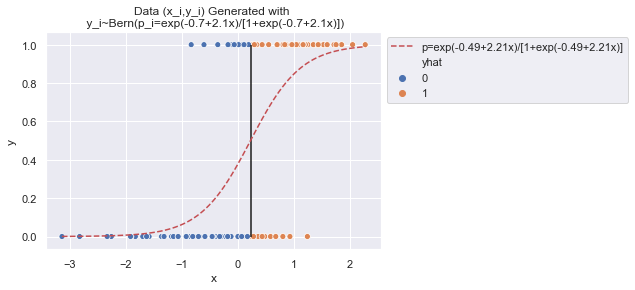

In [14]:
# scatter plot of raw 0/1 data
sns.scatterplot(x='x', y='y', hue='yhat', data=dat)
#
# make a grid of x values for probability curve
xgrid = np.linspace(dat['x'].min(), dat['x'].max(), 100)
#
# get predictive probabilities for the grid
pgrid = simmod.predict(exog=dict(x=xgrid))
#
# add probability curve to the graph
plt.plot(xgrid, pgrid, color='r', linestyle='dashed',label='p=exp(-0.49+2.21x)/[1+exp(-0.49+2.21x)]')
#
# add x threshold line for 0/1 classification
plt.vlines(x=xthresh, ymin=0, ymax=1)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Data (x_i,y_i) Generated with \n y_i~Bern(p_i=exp(-0.7+2.1x)/[1+exp(-0.7+2.1x)])')
plt.show()

<h1 style="color:blue;"><u>Topic 4</u>: How well did our classifer do with a given threshold $p_0$ (or equivalently $x_0$)?</h1>

How is the performance of the classifier on the training data? Because the 0's and 1's have overlapping $x$ values, no classifier based on $x$ only can perfectly classify them.

## Definitions

### Orange = Predicted Positive (predicted to be 1)
#### True Positive:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### False Positive:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Blue = Predicted Negative (predicted to be 0)
#### True Negative:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### False Negative:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

+ The orange colored observations with $y=1$ are correctly classified because they are above the $x$ threshold and therefore have $\hat{y}=1=y$.
+ The blue colored observations with $y=0$ are correctly classified because they are below the $x$ threshold and therefore $\hat{y}=0=y$.


+ The blue colored observations with $y=1$ and the orange colored observations with $y=0$ are incorrectly classified because $\hat{y} \ne y$.



## Confusion matrix for a given threshold.
#### Calculated with:
1. the *true* values (positive = 1 and negative = 0)
2. the *predicted* values (positive = 1 and negative = 0) using a given threshold ($p_0$ or $x_0$)

We can summarize the classification performance for a given classifier by comparing the predicted classes to the true classes. The we cross classify the results.



| Classification  | Actual Negative (0) | Actual Positive (1) |
| --- | --- | --- |
| Predicted Negative (0) | TN = True Neg | FN = False Neg |
| Predicted Positive (1) | FP = False Pos | TP = True Pos |

In [15]:
# This import requires that you already 
# installed the scikit-learn library 
# as described in the introduction to this chapter.
#
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [16]:
confusion_matrix(y_true=dat['y'], y_pred=dat['yhat'])

array([[44, 10],
       [10, 36]], dtype=int64)

#### For the given threshold of $p_0=0.5$ (or equivalently $x_0=0.223) what is the number of:
* true negatives?
<br/>
<br/>
<br/>
<br/>
<br/>
* false positives?
<br/>
<br/>
<br/>
<br/>
<br/>
* false negatives?
<br/>
<br/>
<br/>
<br/>
<br/>
* true positives?
<br/>
<br/>
<br/>
<br/>
<br/>

In [17]:
tn, fp, fn, tp = confusion_matrix(y_true=dat['y'], 
                                  y_pred=dat['yhat']).ravel()
(tn, fp, fn, tp)

(44, 10, 10, 36)

## Sensitivity Rate = True Positive Rate
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [18]:
# Sensitivity = true positive rate
tp / (fn + tp)

0.782608695652174

## Specificity Rate
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [19]:
# Specificity = true negative rate
tn / (fp + tn)

0.8148148148148148

## False Positive Rate = 1-Specificity Rate
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


In [20]:
# False positive rate
fp / (fp + tn)

0.18518518518518517

### Relationship between Sensitivity and Specificity
#### What will happen to sensitivity and specificity if we move $p_0$ up (or equivalently move $x_0$ right)?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### What will happen to sensitivity and specificity if we move $p_0$ down (or equivalently move $x_0$ left)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


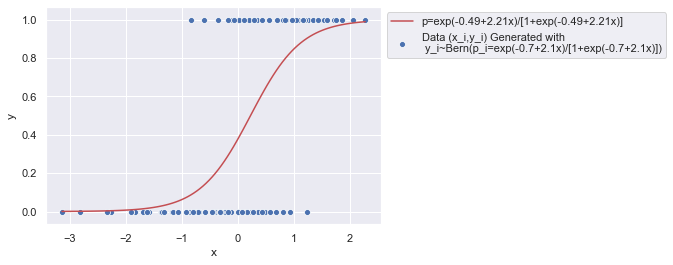

In [21]:
# scatter plot of raw 0/1 data
sns.scatterplot(x='x', y='y', data=dat, label='Data (x_i,y_i) Generated with \n y_i~Bern(p_i=exp(-0.7+2.1x)/[1+exp(-0.7+2.1x)])')
#
# make a grid of x values for the probability curve
xgrid = np.linspace(dat['x'].min(), dat['x'].max(), 100)
#
# get predictive probabilities for the grid
pgrid = simmod.predict(exog=dict(x=xgrid))
#
# add the curve to the plot
plt.plot(xgrid, pgrid, color='r', label='p=exp(-0.49+2.21x)/[1+exp(-0.49+2.21x)]') 
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### In general
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
Sensitivity and specificity are commonly used measures of classification performance. They play against each other in that we can increase one or the other of them by changing the classfiication threshold, but it will be at the cost of decreasing the other.

<h1 style="color:blue;"><u>Topic 5</u>: Taking into account all possible thresholds you could use, how do you assess how well your classifier model fit the data?</h1>

## ROC Curve, plotting sensitivity and specificity across all thresholds.

### How it's built:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


The ROC curve provides a look at the inherent classification ability of a given scoring system, independently of where one sets the threshold on the scores. There will then be an optimal threshold based on the desired tradeoff, which may be deduced from the ROC curve.

### Generating false positive rates and true positive rates for a list of $p_0$ thresholds

In [22]:
fprs, tprs, thresholds = roc_curve(y_true=dat['y'], 
                            y_score=simmod.fittedvalues)
auc = roc_auc_score(y_true=dat['y'], 
                    y_score=simmod.fittedvalues)
print('False Positive Rates')
print(fprs)
print('True Positive Rates')
print(tprs)
print('p_0 Thresholds')
#The 'thresholds' output is a log_odds threshold. We want to convert each log_odds threshold to a p threshold.
# Remember odds= exp(log_odds)
# Also remember p = odds/(1+odds)
p_thresholds=np.exp(thresholds)/(1+np.exp(thresholds))
print(np.round(p_thresholds,2))

False Positive Rates
[0.         0.         0.         0.01851852 0.01851852 0.03703704
 0.03703704 0.05555556 0.05555556 0.09259259 0.09259259 0.12962963
 0.12962963 0.14814815 0.14814815 0.16666667 0.16666667 0.18518519
 0.18518519 0.24074074 0.24074074 0.25925926 0.25925926 0.27777778
 0.27777778 0.31481481 0.31481481 0.42592593 0.42592593 0.51851852
 0.51851852 0.62962963 0.62962963 1.        ]
True Positive Rates
[0.         0.02173913 0.34782609 0.34782609 0.5        0.5
 0.56521739 0.56521739 0.60869565 0.60869565 0.63043478 0.63043478
 0.65217391 0.65217391 0.73913043 0.73913043 0.7826087  0.7826087
 0.80434783 0.80434783 0.84782609 0.84782609 0.86956522 0.86956522
 0.91304348 0.91304348 0.93478261 0.93478261 0.95652174 0.95652174
 0.97826087 0.97826087 1.         1.        ]
p_0 Thresholds
[1.   0.99 0.91 0.9  0.84 0.83 0.78 0.78 0.74 0.69 0.67 0.61 0.61 0.57
 0.54 0.53 0.52 0.5  0.48 0.46 0.42 0.41 0.38 0.38 0.32 0.31 0.29 0.23
 0.22 0.14 0.14 0.09 0.09 0.  ]


#### Interpret the first elements in the three lists above
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### Interpret the last elements in the three lists above
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

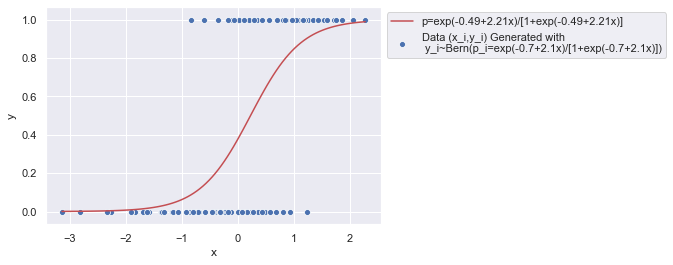

In [23]:
# scatter plot of raw 0/1 data
sns.scatterplot(x='x', y='y', data=dat, label='Data (x_i,y_i) Generated with \n y_i~Bern(p_i=exp(-0.7+2.1x)/[1+exp(-0.7+2.1x)])')
#
# make a grid of x values for the probability curve
xgrid = np.linspace(dat['x'].min(), dat['x'].max(), 100)
#
# get predictive probabilities for the grid
pgrid = simmod.predict(exog=dict(x=xgrid))
#
# add the curve to the plot
plt.plot(xgrid, pgrid, color='r', label='p=exp(-0.49+2.21x)/[1+exp(-0.49+2.21x)]') 
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### ROC CURVE: Plot the false positive rates and the true positive rates in a line plot

Let's define a function for plotting the ROC curve taking the arrays of false postive rates and true positive rates as arguments. (Modified from: https://stackabuse.com/understanding-roc-curves-with-python/)

In [24]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

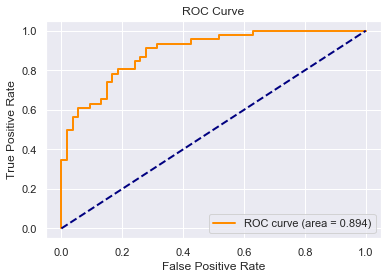

In [25]:
plot_roc(fprs, tprs, auc)

### For a given threshold for a model, what would be the BEST scenario for a (true positive rate, false positive rate) pair?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### If our model *did* in fact have a threshold which produced the best possible scenario for a (true positive rate, false positive rate) pair, what would be the area under the whole ROC curve?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### What is the "area under curve" (AUC) of the ROC curve that we have for this data?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [26]:
auc = roc_auc_score(y_true=dat['y'], 
                    y_score=simmod.fittedvalues)
auc

0.8941223832528181

### What is the WORST ROC curve that we could get (given any dataset and classification model trained on this dataset)?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Thus, what is the "area under curve" (AUC) of the WORST ROC curve that we could get (given any dataset and classification model trained on this dataset)?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Use the ROC Curve and AUC to assess how effective our overall classifier model is at predicting our response variable y.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Use the ROC Curve to pick out an "ideal" threshold for $x_0$.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### ROC/AUC summary

The area under the curve (AUC) is one metric of the amount of information in a classification scoring system. It shows how the true positive and false positive rates track as we change the threshold in the scoring system from a maximum to a minimum possible threshold. 

The curve captures the trade-off between **sensitivity (TP rate)** and **1 - specificity (1 - TN rate)** as the threshold changes.

The baselines for comparison are:

+ Random guessing: its ROC curve is represented by the diagonal dashed line, and its AUC = 0.50.


+ Perfect classification: Its ROC curve would jump up to a true positive rate of 1 at a false positive rate of 0; its ASUC = 1


+ In our example, AUC = 0.89, which is pretty high depending on the context.




<h1 style="color:blue;"><u>Example</u>: Let's build a classifier to predict support for the border wall (given sex, age, and political party).</h1>

In [27]:
zf = zp.ZipFile('Feb17-public.zip')
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df = pd.read_csv(zf.open('Feb17public.csv'),
                 na_values=missing_values)[['age', 'sex', \
                                            'q52', 'party']]

### Don't forget to translate your categorical response variable in 1's and 0's.
Remember...
* 1 = success = level you're interested in = favor border wall
* 0 = failure = level you're not interested in = not favor border wall


In [28]:
# reduce q52 responses to two categories and 
# create binary reponse variable
df['q52'][df['q52']!='Favor'] = 'Not_favor'
df['y'] = df['q52'].map({'Not_favor':0,'Favor':1})
#
# use cleaned data without records that have missing values
dfclean = df.dropna()
dfclean.head(10)

,age,sex,q52,party,y
0,80.0,Female,Not_favor,Independent,0
1,70.0,Female,Not_favor,Democrat,0
2,69.0,Female,Not_favor,Independent,0
3,50.0,Male,Favor,Republican,1
4,70.0,Female,Not_favor,Democrat,0
5,78.0,Male,Not_favor,Democrat,0
6,89.0,Female,Not_favor,Independent,0
7,92.0,Female,Not_favor,Republican,0
8,54.0,Female,Favor,Independent,1
9,58.0,Female,Not_favor,Independent,0


### MODEL 1: Let's first model favor/not favor of border wall with just age and sex as explanatory variables.

In [29]:
mod1 = smf.logit('y ~ age + sex', data=dfclean).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.619057
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1465
Model:                          Logit   Df Residuals:                     1462
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:                 0.03557
Time:                        19:08:34   Log-Likelihood:                -906.92
converged:                       True   LL-Null:                       -940.37
Covariance Type:            nonrobust   LLR p-value:                 2.960e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.0818      0.196    -10.637      0.000      -2.465      -1.698
sex[T.Male]     0.5415      0.114      4.750      0.000       0.318       0.765
age             0.0220      0.003      6.770      0.000       0.016       0.028
===============================================================================
"""

In [30]:
fprs, tprs, thresholds = roc_curve(y_true=dfclean['y'], 
                            y_score=mod1.fittedvalues)
auc = roc_auc_score(y_true=dfclean['y'], 
                    y_score=mod1.fittedvalues)
print(auc)

0.6265544041450778


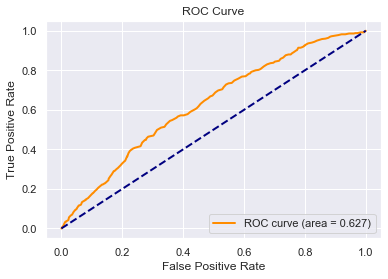

In [31]:
plot_roc(fprs, tprs, auc)

### Assessing Effectiveness of Classifier Model 1
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
We see that although 'age' and 'sex' are statistically signficant variables in the model, using only these variables to predict 'y' is not much better than random guessing. There is too much variation beyond that explained by age and gender to rely on them for accurate classfication.

### MODEL 2: Let's next see if we can make our model for predicting favor/not favor of border wall better if we NOW use the following explanatory variables:
* age
* sex
* political party

Let's see what happens if we add 'party' to the model as an additional explanatory variable.

In [32]:
mod2 = smf.logit('y ~ party + age + sex', data=dfclean).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.466129
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1465
Model:                          Logit   Df Residuals:                     1458
Method:                           MLE   Df Model:                            6
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:                  0.2738
Time:                        19:08:35   Log-Likelihood:                -682.88
converged:                       True   LL-Null:                       -940.37
Covariance Type:            nonrobust   LLR p-value:                4.971e-108
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.5261      0.281    -12.536      0.000      -4.077      -2.975
party[T.Independent]              1.6843      0.191      8.796      0.000       1.309       2.060
party[T.No preference (VOL.)]     1.8226      0.379      4.807      0.000       1.079       2.566
party[T.Other party (VOL.)]       2.8930      0.938      3.083      0.002       1.054       4.732
party[T.Republican]               3.5862      0.206     17.435      0.000       3.183       3.989
sex[T.Male]                       0.3721      0.137      2.712      0.007       0.103       0.641
age                               0.0168      0.004      4.305      0.000       0.009       0.024
=================================================================================================
"""

Note that including 'party' entails that a few more of the rows have missing information than when we only included 'age' and 'sex'. 

In [33]:
fprs, tprs, thresholds = roc_curve(y_true=dfclean['y'], 
                            y_score=mod2.fittedvalues)
auc = roc_auc_score(y_true=dfclean['y'], 
                    y_score=mod2.fittedvalues)
print(auc)

0.8329699481865286


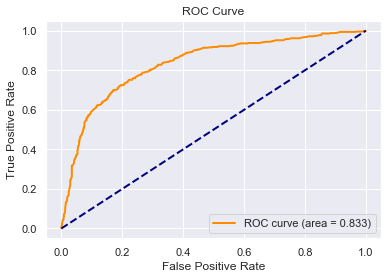

In [34]:
plot_roc(fprs, tprs, auc)

### Assessing the Effectiveness of Classifier Model 2
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
It appears that including party affiliation in the model gives a big improvement in the ability of the model to predict the answer to 'q52', increasing the area under the curve from 0.63 to 0.83. There is still substantial variation remaining. 



### What threshold should we choose and how effective is our classifier with that threshold? What does that threshold mean?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
We can see that the ROC curve starts to level off around a false positive rate around 0.42. This corresponds to a true positive rate of around 0.93. These rates were generated by using a $p_0$ threshold of 0.22.

We see that peoples' opinions are more than just the sum of their age, gender and party affiliation.

In [35]:
print('False Positive Rates')
print(fprs)
print('True Positive Rates')
print(tprs)
print('p_0 Thresholds')
#The 'thresholds' output is a log_odds threshold. We want to convert each log_odds threshold to a p threshold.
# Remember odds= exp(log_odds)
# Also remember p = odds/(1+odds)
p_thresholds=np.exp(thresholds)/(1+np.exp(thresholds))
print(np.round(p_thresholds,2))

False Positive Rates
[0.         0.         0.         0.00103627 0.00103627 0.00207254
 0.00207254 0.00310881 0.00310881 0.00310881 0.00414508 0.00518135
 0.00621762 0.00725389 0.00725389 0.00725389 0.00829016 0.00829016
 0.00932642 0.01139896 0.01139896 0.01139896 0.01243523 0.01243523
 0.01243523 0.0134715  0.01450777 0.01450777 0.01865285 0.01865285
 0.01865285 0.01865285 0.01968912 0.02279793 0.0238342  0.0238342
 0.0238342  0.02487047 0.02487047 0.02694301 0.02797927 0.02901554
 0.02901554 0.02901554 0.03108808 0.03212435 0.03212435 0.03419689
 0.03419689 0.03419689 0.03419689 0.03419689 0.03419689 0.03419689
 0.03419689 0.0373057  0.03834197 0.04145078 0.04145078 0.04248705
 0.04248705 0.04455959 0.04455959 0.04663212 0.04766839 0.04870466
 0.04974093 0.05284974 0.05284974 0.05284974 0.05388601 0.05492228
 0.05492228 0.05699482 0.05803109 0.05803109 0.05803109 0.05906736
 0.05906736 0.05906736 0.05906736 0.0611399  0.0611399  0.06217617
 0.0642487  0.0642487  0.06632124 0.067357

### What index(s) in the fprs list is equal to around 0.42?

In [36]:
np.where((fprs>.40) & (fprs<.44))

(array([240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250], dtype=int64),)

### What is the corresponding true positive rate and $p_0$ threshold (for a false positive rate of 0.4)?

In [37]:
print('True positive rate')
print(tprs[27])
print('p_0 threshold')
print(p_thresholds[27])

True positive rate
0.132
p_0 threshold
0.8162119939653578


#### Thus, using this threshold, how would our model classify a 20-year old, female, Democrat?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [38]:
mod2.predict(exog=dict(age=20, sex='Female', party='Democrat'))

0    0.039545
dtype: float64

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign